In [39]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

# Exploring DATA

In [40]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [41]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [42]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [43]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [44]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [45]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [46]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [47]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [48]:
df.duration.value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
41.08       1
35.67       1
47.08       1
44.50       1
41.50       1
Name: count, Length: 476, dtype: int64

In [49]:
df['duration'].max()

np.float64(49.83)

In [50]:
df['duration'].min()


np.float64(0.83)

# Preprocessing DATA

In [51]:
df = df.drop(columns = ['Unnamed: 0'],axis = 1)
df = df.drop(columns = ['flight'],axis = 1)

df['class'] = df['class'].apply(lambda x: 1 if x =='Business' else 0)

In [52]:
df.stops = pd.factorize(df.stops)[0]

In [53]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [54]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [55]:
df = df.join(pd.get_dummies(df.airline,prefix="airline",dtype=int)).drop(columns=['airline'],axis=1)

df = df.join(pd.get_dummies(df.source_city,prefix='source',dtype=int)).drop(columns = ['source_city'],axis = 1)

df = df.join(pd.get_dummies(df.destination_city,prefix='destination',dtype=int)).drop(columns = ['destination_city'],axis = 1)

df = df.join(pd.get_dummies(df.arrival_time,prefix='arrival',dtype=int)).drop(columns = ['arrival_time'],axis = 1)

df = df.join(pd.get_dummies(df.departure_time,prefix='departure',dtype=int)).drop(columns = ['departure_time'],axis = 1)

In [57]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [58]:
df.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [59]:
df.shape

(300153, 35)

# Model Training RandomForestRegressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x,y = df.drop('price',axis=1), df['price']

In [62]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [64]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
reg.score(x_test,y_test)

0.9851740373420134

# Evaluating Model

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import math

y_pred = reg.predict(x_test)

print("R2: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2:  0.9851740373420134
MAE:  1076.4173247921415
MSE:  7658361.355946689
RMSE:  2767.3744517044834


Text(0.5, 1.0, 'Actual vs Predicted Flight Price')

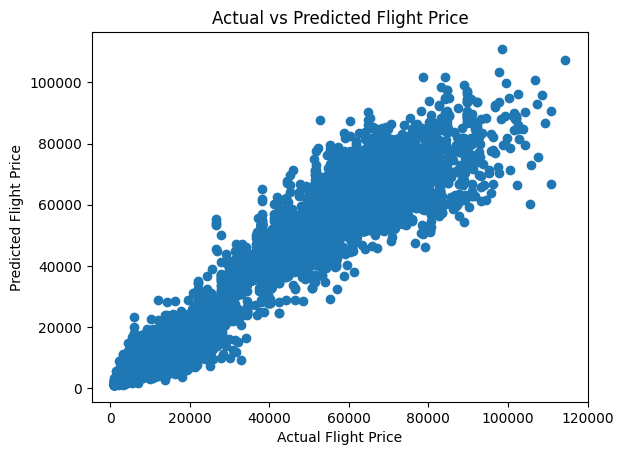

In [67]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Price')

In [73]:
importances = dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_importances:
    print(f"{feature:<25} : {importance:.6f}")


class                     : 0.879817
duration                  : 0.057470
days_left                 : 0.018657
airline_Air_India         : 0.005141
airline_Vistara           : 0.004941
source_Delhi              : 0.003874
destination_Delhi         : 0.003520
source_Mumbai             : 0.002202
destination_Kolkata       : 0.001904
destination_Mumbai        : 0.001813
stops                     : 0.001796
source_Kolkata            : 0.001775
arrival_Evening           : 0.001546
destination_Hyderabad     : 0.001505
source_Hyderabad          : 0.001248
destination_Bangalore     : 0.001225
departure_Evening         : 0.001118
arrival_Night             : 0.001094
source_Bangalore          : 0.001032
arrival_Afternoon         : 0.000995
source_Chennai            : 0.000932
departure_Morning         : 0.000900
destination_Chennai       : 0.000868
departure_Early_Morning   : 0.000805
departure_Night           : 0.000789
departure_Afternoon       : 0.000763
arrival_Morning           : 0.000673
a

In [74]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

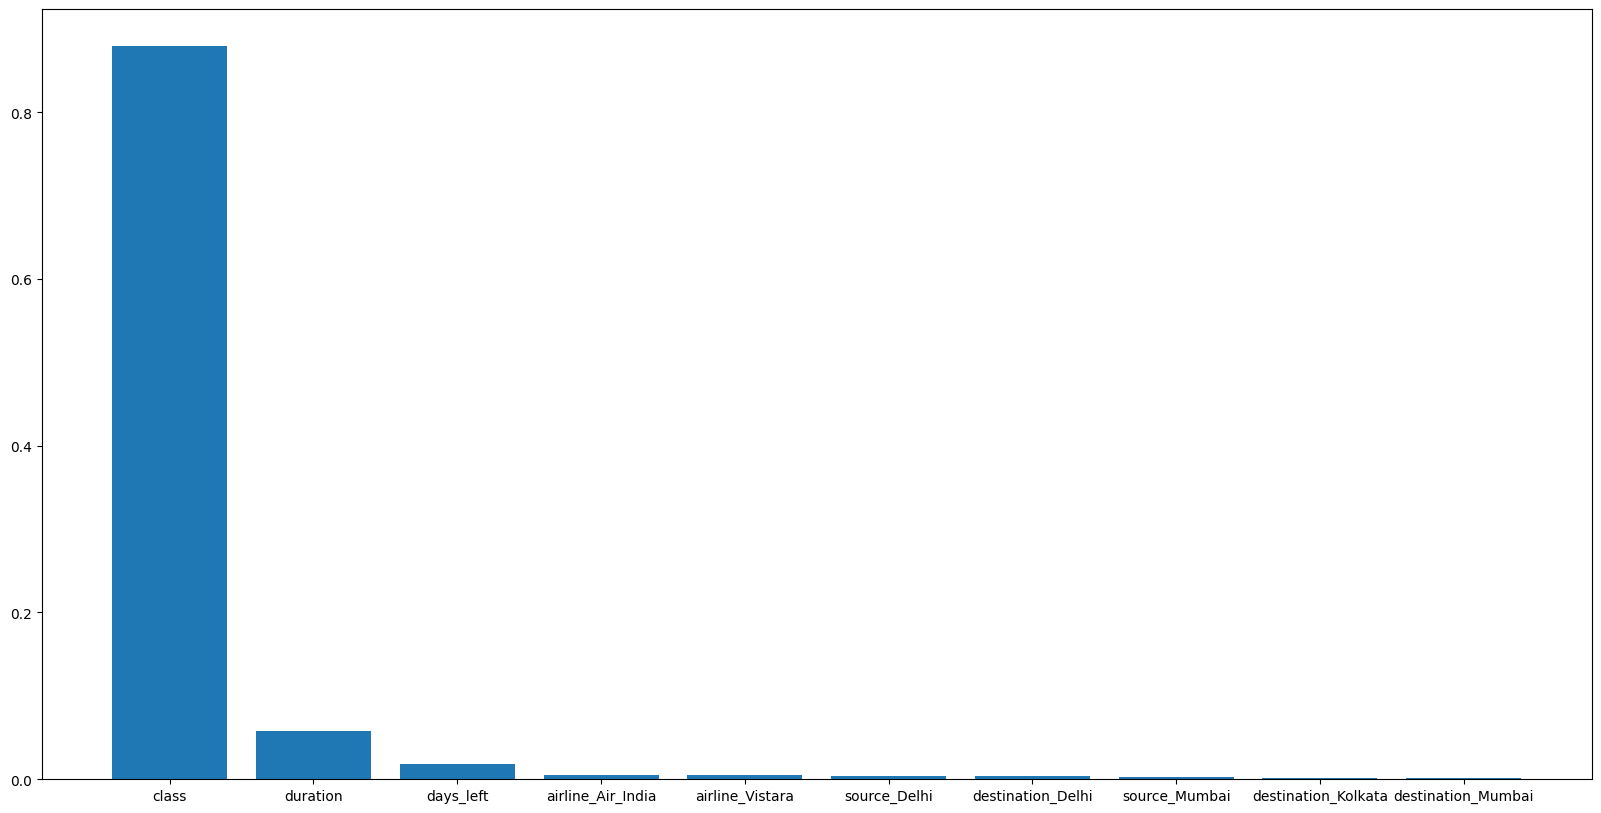

In [77]:
plt.figure(figsize = (20,10))
plt.bar([x[0] for x in sorted_importances[:10]],[x[1] for x in sorted_importances[:10]])

# Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)
# Param1 : A,B,C
# Param2: X,Y,Z
# AX,AY,AZ,BX,BY,BZ....

param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['auto','sqrt']
}

grid_search = GridSearchCV(reg, param_grid,cv=5)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_

KeyboardInterrupt: 